In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
lowContrastImage = cv2.imread('images/low_contrast.jpg')
print('lowContrastImage.dtype is %s ' % (lowContrastImage.dtype))
print('lowContrastImage.shape ',lowContrastImage.shape)
# 图像行数
rows = lowContrastImage.shape[0]
# opencv读彩色图默认是按照b g r 的格式，转成r g b 的方便处理
lowContrastImage = cv2.cvtColor(lowContrastImage, cv2.COLOR_BGR2RGB)
# split 通道分离  性能比较差 慎用!
r,g,b=cv2.split(lowContrastImage)
# flatten() 将多维数组降为一维 与 np.ravel()功能一致，
# 区别是返回拷贝还是返回视图，np.flatten(）返回一份拷贝，对拷贝所做修改不会影响原始矩阵，
# 而np.ravel()返回的是视图，修改时会影响原始矩阵 
ar = np.array(r).flatten() 
ag = np.array(g).flatten() 
ab = np.array(b).flatten() 


lowContrastImage.dtype is uint8 
lowContrastImage.shape  (233, 350, 3)


In [3]:
# 计算原始直方图的概率
# array 一维的像素数组
# return list 中存放着一维像素数组中 像素 及 该像素出现的概率
def countOriginalProbability(array):
    dict  = {}
    arrLength = len(array)
    for a in array:
        dict[a] = dict.get(a,0) + 1
    for p in dict :
        dict[p] = dict.get(p) / arrLength
    # dict中像素数值的顺序是无序的，需要根据像素数值大小升序排序
    list = sorted(dict.items(), key=lambda d: d[0])
    return list

In [4]:
arList = countOriginalProbability(ar)
#print(arList)
agList = countOriginalProbability(ag)
abList = countOriginalProbability(ab)

In [5]:
# 计算累计直方图的概率
# list
# reutrn dict 存放像素及对应的累计概率
def countAccumulatedProbability(list):
    listLength = len(list)
    sumProb = 0
    dict={}
    for i in range(listLength):
        sumProb += list[i][1]
        dict[list[i][0]] = sumProb
    return dict

In [6]:
countarDict = countAccumulatedProbability(arList)
# print(countarDict)
countagDict = countAccumulatedProbability(agList)
countabDict = countAccumulatedProbability(abList)

In [7]:
# 取整扩展
# list
# L 灰度级
# reutrn reflectedDict 存放原像素与处理后像素的映射
def floorExtend(dict,L):
    reflectedDict = {}
    for i in dict:
        reflectedDict[i] = int( (L - 1) * dict.get(i) + 0.5)
    return reflectedDict

In [8]:
reflectedRDict = floorExtend(countarDict,256)
reflectedGDict = floorExtend(countagDict,256)
reflectedBDict = floorExtend(countabDict,256)

# print(reflectedRDict)
# print(reflectedGDict)
# print(reflectedBDict)

In [9]:
# 根据取整扩展的映射关系获取映射后的像素数组
# array 原像素数组
# reflectedDict
# return reflectedArray 
def getEquilibriumArray(array,reflectedDict):
    arrLength = len(array)
    reflectedArray = []#np.zeros((arrLength))
    for i in range(arrLength):
        #print(reflectDict.get(array[i]))
        reflectedArray.append(reflectedDict.get(array[i]))
    return reflectedArray

In [10]:
reflectedRArray = getEquilibriumArray(ar,reflectedRDict)
reflectedGArray = getEquilibriumArray(ag,reflectedGDict)
reflectedBArray = getEquilibriumArray(ab,reflectedBDict)

In [11]:
# np.reshape() 在不改变数据内容的情况下，改变一个数组的格式。
reflectedRArray2 = np.reshape(reflectedRArray, (rows,-1))
reflectedGArray2 = np.reshape(reflectedGArray, (rows,-1))
reflectedBArray2 = np.reshape(reflectedBArray, (rows,-1))



In [12]:
def exp(array,c,y):
    arrLength = len(array)
    stretchArray = []
    for i in range(arrLength):
        stretchArray.append(math.ceil(c * math.pow(array[i],y)))
    return stretchArray

In [19]:
stretchRArray = exp(ar,2,1)
stretchGArray = exp(ag,2,1)
stretchBArray = exp(ab,2,1)

stretchRArray2 = np.reshape(stretchRArray, (rows,-1))
print(stretchRArray2)
stretchGArray2 = np.reshape(stretchGArray, (rows,-1))
stretchBArray2 = np.reshape(stretchBArray, (rows,-1))

[[194 194 194 ... 196 198 200]
 [194 194 194 ... 196 196 198]
 [194 194 194 ... 198 196 196]
 ...
 [156 158 160 ... 162 160 158]
 [156 158 162 ... 160 158 156]
 [154 152 154 ... 162 162 160]]


原始图像R通道 shape  (233, 350)
拉伸图像R通道stretchRArray  shape  (233, 350)
处理后图像R通道 shape  (233, 350)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


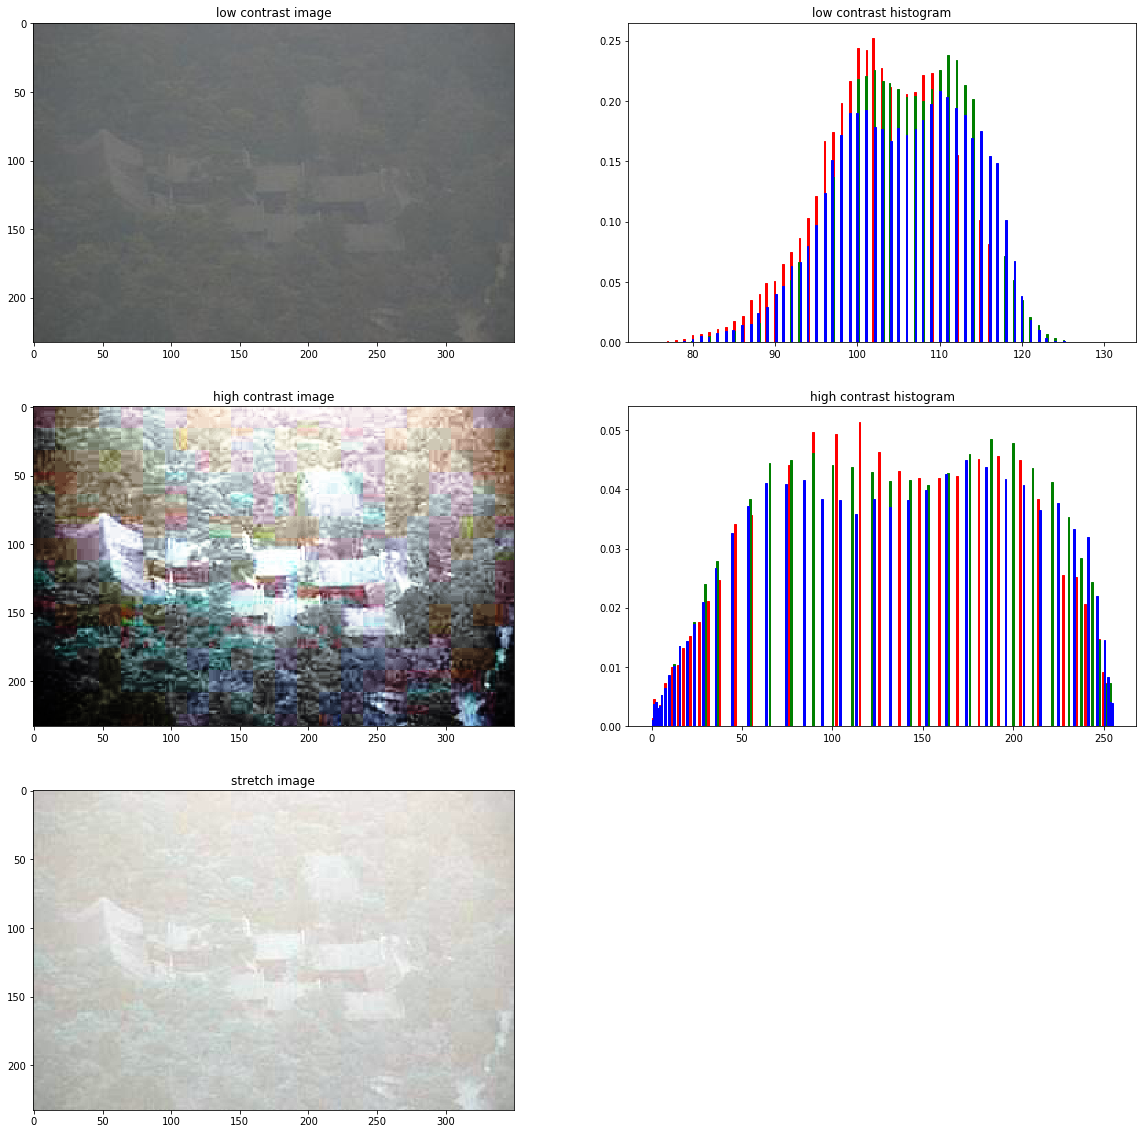

In [20]:
# print(reflectedRArray)
# print(reflectedGArray)
# print(reflectedBArray)
src = cv2.merge([reflectedBArray2,reflectedGArray2,reflectedRArray2])
# src = cv2.merge([b,g,r])
print('原始图像R通道 shape ',r.shape)
print('拉伸图像R通道stretchRArray  shape ',stretchRArray2.shape)
print('处理后图像R通道 shape ',reflectedRArray2.shape)
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.imshow(lowContrastImage)
plt.title("low contrast image")

plt.subplot(3, 2, 2)
ar = np.array(r).flatten() 
ag = np.array(g).flatten() 
ab = np.array(b).flatten() 
plt.hist(ar,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
plt.hist(ag,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
plt.hist(ab,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
plt.title("low contrast histogram")

plt.subplot(3, 2, 3)
plt.imshow(src)
plt.title("high contrast image")

plt.subplot(3, 2, 4)
plt.hist(reflectedRArray,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
plt.hist(reflectedGArray,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
plt.hist(reflectedBArray,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
plt.title("high contrast histogram")

plt.subplot(3, 2, 5)
src2 = cv2.merge([stretchBArray2,stretchGArray2,stretchRArray2])
plt.imshow(src2)
plt.title("stretch image")

# plt.subplot(3, 2, 6)
# plt.hist(stretchBArray2,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
# plt.hist(stretchBArray2,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
# plt.hist(stretchRArray2,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
# plt.title("high contrast histogram")





plt.show()